<a href="https://colab.research.google.com/github/MuskanJ30/Anomaly-Detection/blob/master/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [16]:
pip install darts

In [17]:
import pandas as pd
from darts import TimeSeries
from darts.datasets import ETTh2Dataset
import matplotlib.pyplot as plt

# Load Datasets

In [18]:
series = ETTh2Dataset().load()[:10000][["MUFL", "LULL"]]

# Split Data

<Axes: xlabel='date'>

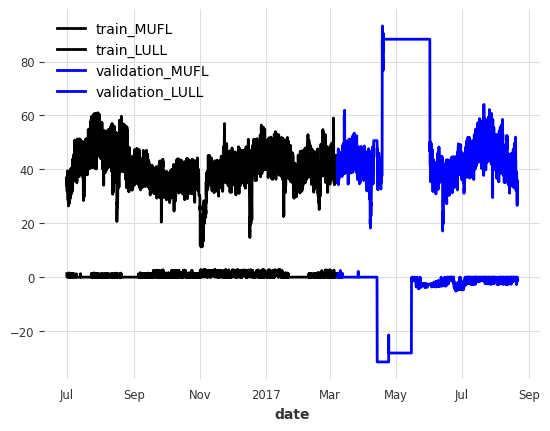

In [19]:
train, val = series.split_before(0.6)

train.plot(label="train", c="black")
val.plot(label="validation", c="blue")

# Build k-means anomaly scorer

In [20]:
from darts.ad import KMeansScorer
scorer = KMeansScorer(k=2, window=5)

# Train

In [21]:
scorer.fit(train)

# Validate

In [22]:
anom_score = scorer.score(val)

# Visualize

<Axes: xlabel='date'>

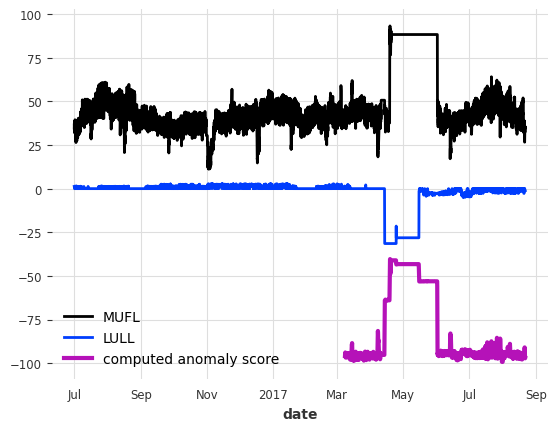

In [23]:
import matplotlib.pyplot as plt

series.plot()
#anom_score.plot(label="computed anomaly score", lw=3)
(anom_score / 2. - 100).plot(label="computed anomaly score", lw=3)

# Build a binary anomaly detector

In [24]:
from darts.ad import QuantileDetector
detector = QuantileDetector(high_quantile=0.99)

# Train

In [25]:
detector.fit(scorer.score(train))

# Validate

In [26]:
binary_anom = detector.detect(anom_score)

# Visualize

<Axes: xlabel='date'>

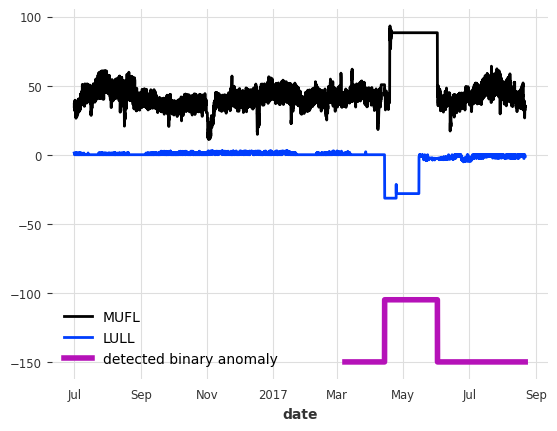

In [27]:
series.plot()
#binary_anom.plot(label="detected binary anomaly", lw=4)
(binary_anom * 45 - 150).plot(label="detected binary anomaly", lw=4)